In [19]:
%%bash
cd /kaggle/working/
rm -rf /kaggle/working/bai_tap_thay_vinh
git clone https://github.com/daoanhkhoa123/bai_tap_thay_vinh.git

cd /kaggle/working/bai_tap_thay_vinh
wget -O /kaggle/working/bai_tap_thay_vinh/Lenna.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
ls

Lenna.png
main_code.py
push.cmd
README.md
run.ipynb


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
chdir: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Cloning into 'bai_tap_thay_vinh'...
--2026-01-16 00:39:41--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘/kaggle/working/bai_tap_thay_vinh/Lenna.png’

     0K .......... .......... .......... .......... .......... 10% 8.48M 0s
    50K .......... .......... .......... .......... .......... 21% 16.6M 0s
   100K .......... .......... .......... .......... .......... 32% 23.5M 0s
   150K .......... .......... .......... .......... .......... 43% 26.3M 0s
   200K 

In [20]:
%cd bai_tap_thay_vinh/
%ls

[Errno 2] No such file or directory: 'bai_tap_thay_vinh/'
/kaggle/working/bai_tap_thay_vinh
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


# Correlation Convolution

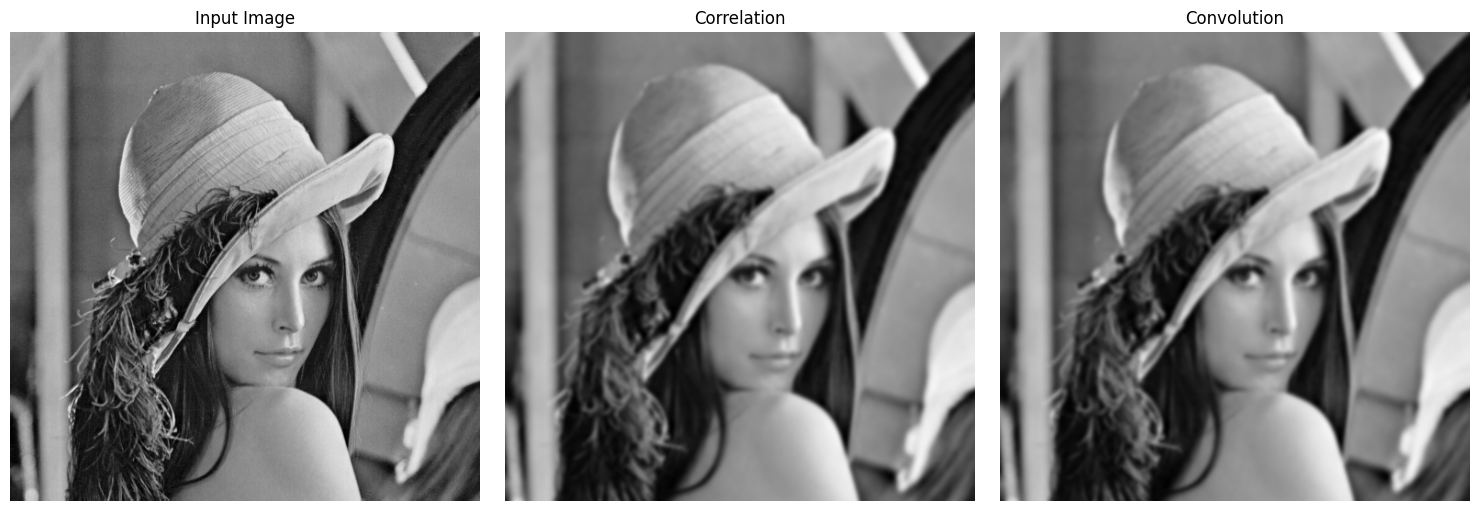

In [21]:
from main_code import *
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("/kaggle/working/bai_tap_thay_vinh/Lenna.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

kernel = GaussianMask.mask_gauss(sigma=2.0, size=21)
kernel /= kernel.sum()

corr = Convolution_Correlation.correlation(img, kernel)
conv = Convolution_Correlation.convolution(img, kernel)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(corr, cmap="gray")
plt.title("Correlation")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(conv, cmap="gray")
plt.title("Convolution")
plt.axis("off")

plt.tight_layout()
plt.show()


# Gaussian Kernel

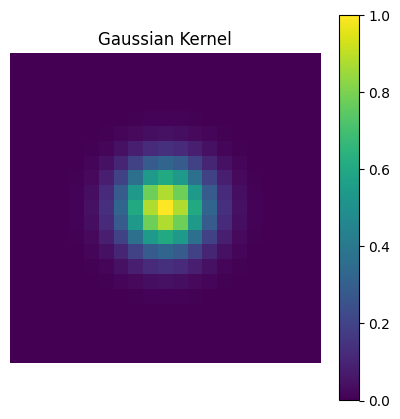

In [22]:
kernel = GaussianMask.mask_gauss(sigma=2.0, size=21)

plt.figure(figsize=(5,5))
plt.imshow(kernel, cmap="viridis")
plt.title("Gaussian Kernel")
plt.colorbar()
plt.axis("off")
plt.show()


# Compare

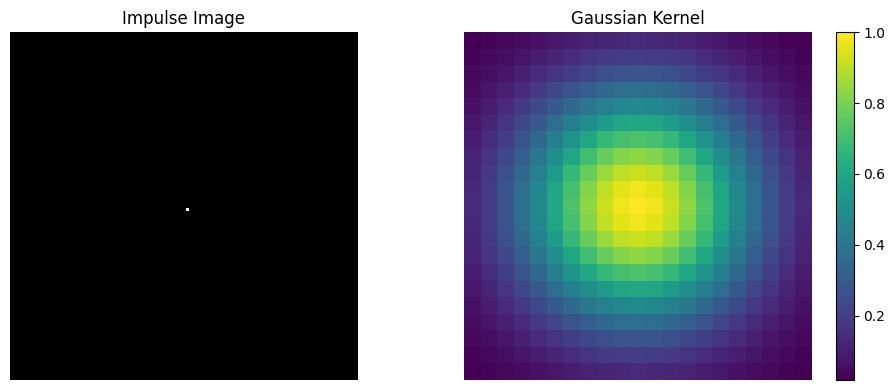

Mean |Conv - FFT| : 0.037257534
Mean |Corr - FFT| : 0.037257534
Mean |Conv - Corr|: 0.0


In [23]:
img = FilterImage.create_img(size=101, value=1).astype(np.float32)
kernel = GaussianMask.mask_gauss(sigma=5, size=21)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Impulse Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(kernel, cmap="viridis")
plt.title("Gaussian Kernel")
plt.colorbar()
plt.axis("off")

plt.tight_layout()
plt.show()

FourierGaussianFilter.test()


# Gaussian Pyramid

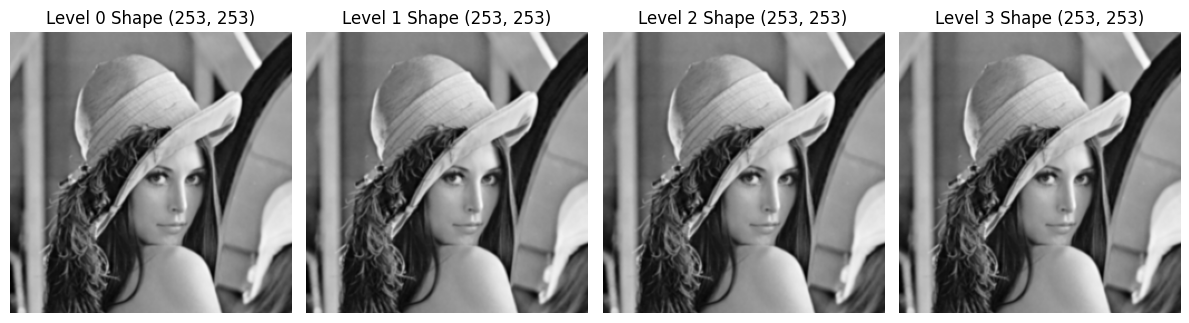

In [24]:
img = cv.imread("/kaggle/working/bai_tap_thay_vinh/Lenna.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

pyramid = GaussianPyramid.gaussian_pyramid(
    img=img,
    size=7,
    sigma=1.5,
    time=4
)

plt.figure(figsize=(12,4))

for i, level in enumerate(pyramid):
    plt.subplot(1, len(pyramid), i + 1)
    plt.imshow(level, cmap="gray")
    plt.title(f"Level {i} Shape {level.shape}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [25]:
class GaussianPyramid:
    @staticmethod
    def _one_loop(img: NDArray, kernel:NDArray) -> NDArray:
        res = Convolution_Correlation.convolution(img, kernel)
        return res[::2, ::2]

    @staticmethod
    def gaussian_pyramid(img: NDArray, size: int, sigma:float, time: int) -> Sequence[NDArray]:
        kernel = GaussianMask.mask_gauss(sigma, size)
        res = [img]
        for i in range(time):
            res.append(GaussianPyramid._one_loop(res[i], kernel))
        return res

In [27]:
GaussianPyramid._one_loop(img, kernel).shape

(246, 246)

In [28]:
img.shape

(512, 512)